In [102]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import re

In [103]:
data = pd.read_csv('./google-play-store.csv')
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### Cleaning Data

In [104]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [105]:
# Drop some unuse data: Current ver, last updated due to lack of information insight
data.drop(columns=['Last Updated', 'Current Ver'], inplace=True)

In [106]:
# Check nah
data.isna().sum()[data.isna().sum() > 0]

Rating            1474
Type                 1
Content Rating       1
Android Ver          3
dtype: int64

**Reviews**

In [107]:
# Run this code to detect strange value: '3.0M' in Reviews
# data.Reviews = data.Reviews.astype('int64')

In [108]:
# Rating beyond 5.0, Size small, category unknow => outlier, need to remove
data[data.Reviews.str.contains('M')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",NaN


In [109]:
data.drop(labels=[10472], axis=0,inplace=True)

In [110]:
# Now it safe to astype int
data.Reviews = data.Reviews.astype('int64')

**App**

In [111]:
# App check duplicated
print('N Unique: {}, N Duplicated: {}'.format(data.App.nunique(), data.App.size - data.App.nunique()))
duplicated_app = data.App[data.App.duplicated()]
data.App[data.App.duplicated()].head()

N Unique: 9659, N Duplicated: 1181


229    Quick PDF Scanner + OCR FREE
236                             Box
239              Google My Business
256             ZOOM Cloud Meetings
261       join.me - Simple Meetings
Name: App, dtype: object

In [112]:
# They are exactly the same! So we can remove it from dataframe
data[data.App == duplicated_app.iloc[0]]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Android Ver
222,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,4.0.3 and up
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,4.0.3 and up
285,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80804,Varies with device,"5,000,000+",Free,0,Everyone,Business,4.0.3 and up


In [113]:
data.drop_duplicates(subset='App', inplace=True)
data[data.App == duplicated_app.iloc[0]]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Android Ver
222,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,4.0.3 and up


**Some App are not duplicated, but they are still the same (fake app)**

In [114]:
# Check Again with lower and strip
data.App = data.App.str.lower()
data.App = data.App.str.strip()
print('Check App are unique:', data.App.size == data.App.nunique())
print('N Unique: {}, N Duplicated: {}'.format(data.App.nunique(), data.App.size - data.App.nunique()))
duplicated_app = data.App[data.App.duplicated()]
data.App[data.App.duplicated()].head()

Check App are unique: False
N Unique: 9638, N Duplicated: 21


2827          photo frame
3927           4 in a row
4924    ac remote control
4941    ac remote control
5077              applock
Name: App, dtype: object

In [115]:
data[data.App == duplicated_app.iloc[3]]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Android Ver
4902,ac remote control,TOOLS,3.3,472,2.0M,"100,000+",Free,0,Everyone,Tools,4.1 and up
4924,ac remote control,TOOLS,3.7,822,5.0M,"50,000+",Free,0,Everyone,Tools,2.3 and up
4941,ac remote control,TOOLS,3.7,9514,7.0M,"500,000+",Free,0,Everyone,Tools,4.0.3 and up


In [116]:
# Keep the largest Reviews
data = data.sort_values('Reviews', ascending=False).drop_duplicates('App').sort_index()

In [117]:
data[data.App == duplicated_app.iloc[3]]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Android Ver
4941,ac remote control,TOOLS,3.7,9514,7.0M,"500,000+",Free,0,Everyone,Tools,4.0.3 and up


**Category & Genres**

In [118]:
data.Category = data.Category.str.lower()
data.Genres = data.Genres.str.lower()
data.Category.nunique()

33

In [119]:
data.Category = data.Category.astype('category')
data.Genres = data.Genres.astype('category')

**'video players' and 'video players & editors' are the same**

In [120]:
data[data.Genres.str.contains('editors')].Genres.unique()

['video players & editors;creativity', 'video players & editors', 'video players & editors;music & video']
Categories (3, object): ['video players & editors;creativity', 'video players & editors', 'video players & editors;music & video']

In [121]:
data[data.Genres.str.contains('video players')].Genres.unique()

['video players & editors;creativity', 'video players & editors', 'video players & editors;music & video']
Categories (3, object): ['video players & editors;creativity', 'video players & editors', 'video players & editors;music & video']

**Remove Editors Genre is safety**

In [122]:
data[data.Genres.str.contains('editors')].Category.unique()

['family', 'video_players']
Categories (2, object): ['family', 'video_players']

In [123]:
data[np.logical_and(data.Category.str.contains('family').to_numpy(), data.Genres.str.contains('editors').to_numpy())].Genres.unique()

['video players & editors;creativity', 'video players & editors;music & video']
Categories (2, object): ['video players & editors;creativity', 'video players & editors;music & video']

In [124]:
# Category: art_and_design -- Genres: art & design
# 2 different between _and_ -- &
# video players --- video players & editors
def standard_genres_category(text):
    text = re.sub(' & editors', '', text)
    text = re.sub('&', 'and', text)
    text = re.sub(' ', '_', text)
    text = re.sub(';', ' ', text)
    return text

data.Genres = data.Genres.apply(standard_genres_category)

In [125]:
def check_unique_genres(series):
    dictionary = set()
    for idx in series:
        for i in idx.split():
            dictionary.add(i)
    return dictionary

dictionary = check_unique_genres(data.Genres.unique())
print(len(dictionary))

53


**List genres that not in category**

In [126]:
np.array(list(filter(lambda x: x not in data.Category.unique().to_numpy(), dictionary)))

array(['strategy', 'word', 'music_and_video', 'educational',
       'brain_games', 'pretend_play', 'music', 'action_and_adventure',
       'arcade', 'action', 'board', 'creativity', 'puzzle', 'simulation',
       'trivia', 'adventure', 'casual', 'music_and_audio', 'card',
       'casino', 'role_playing', 'racing'], dtype='<U20')

In [127]:
# => Education and educational are the same
data.Genres = data.Genres.apply(lambda x: re.sub('educational', 'education', x))
data.Genres = data.Genres.apply(lambda x: re.sub('education education', 'education', x))

**Size**

In [128]:
def standard_size(size):
    if size[-1] == 'M':
        size = float(size[:-1]) * 1000
    elif size[-1] == 'k':
        size = float(size[:-1])
    else:
        size = None
    return size

data.Size = data.Size.apply(standard_size)
data.Size.fillna(value=data.Size.mean(), inplace=True)
data.Size = data.Size.astype('int')
size_describer = data.Size.describe()

# Define large - medium - small base on -s 25% -m 50% -m 75% -l
def convert_size(size, size_describer):
    if size >= size_describer['75%']:
        return 'large'
    elif size <= size_describer['25%']:
        return 'small'
    else:
        return 'medium'

data['Size Label'] = data.Size.apply(lambda x: convert_size(x, size_describer))
data['Size Label'] = data['Size Label'].astype('category')

**Installs**

In [129]:
data.Installs.unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [130]:
data[data.Installs == '10+'].head()
# => Most of unkown apps have not rated yet

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Android Ver,Size Label
625,house party - live chat,dating,1.0,1,9200,10+,Free,0,Mature 17+,dating,4.0.3 and up,medium
630,pet lovers dating,dating,NaN,0,14000,10+,Free,0,Mature 17+,dating,4.1 and up,medium
632,latin dating,dating,NaN,0,13000,10+,Free,0,Mature 17+,dating,4.1 and up,medium
635,wifi mingle,dating,NaN,0,10000,10+,Free,0,Everyone,dating,4.4 and up,medium
638,when will you get married,dating,NaN,2,3600,10+,Free,0,Everyone,dating,4.0.3 and up,small


In [131]:
data.Installs = data.Installs.apply(lambda x: int(re.sub(',', '', x[:-1] if x != '0' else x)))

def convert_installs(install):
    if install == 10**9:
        return "Billions"
    elif install == 5*10**8:
        return '500 Millions'
    elif install == 10**8:
        return "100 Millions"
    elif install >= 10**6:
        return "Millions"
    elif install >= 10**3:
        return "Thousands"
    else:
        return "Unknown App"

data.Installs = data.Installs.apply(convert_installs)
data.Installs = data.Installs.astype('category')

**Type**

In [132]:
data[data.Type.isna()]
# => safely remove

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Android Ver,Size Label
9148,command & conquer: rivals,family,NaN,0,20419,Unknown App,NaN,0,Everyone 10+,strategy,Varies with device,medium


In [133]:
data.drop(labels=data[data.Type.isna()].index[0], axis=0,inplace=True)
data.Type.unique()

array(['Free', 'Paid'], dtype=object)

**Price**

In [134]:
data.Price = data.Price.apply(lambda x: float(x[1:]) if x != '0' else 0)
data[data.Price >= 100]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Android Ver,Size Label
4197,most expensive app (h),family,4.3,6,1500,Unknown App,Paid,399.99,Everyone,entertainment,7.0 and up,small
4362,💎 i'm rich,lifestyle,3.8,718,26000,Thousands,Paid,399.99,Everyone,lifestyle,4.4 and up,large
4367,i'm rich - trump edition,lifestyle,3.6,275,7300,Thousands,Paid,400.00,Everyone,lifestyle,4.1 and up,medium
5351,i am rich,lifestyle,3.8,3547,1800,Thousands,Paid,399.99,Everyone,lifestyle,4.0.3 and up,small
5354,i am rich plus,family,4.0,856,8700,Thousands,Paid,399.99,Everyone,entertainment,4.4 and up,medium
5355,i am rich vip,lifestyle,3.8,411,2600,Thousands,Paid,299.99,Everyone,lifestyle,4.3 and up,small
5356,i am rich premium,finance,4.1,1867,4700,Thousands,Paid,399.99,Everyone,finance,4.0 and up,small
5357,i am extremely rich,lifestyle,2.9,41,2900,Thousands,Paid,379.99,Everyone,lifestyle,4.0 and up,small
5358,i am rich!,finance,3.8,93,22000,Thousands,Paid,399.99,Everyone,finance,4.1 and up,medium
5359,i am rich(premium),finance,3.5,472,965,Thousands,Paid,399.99,Everyone,finance,4.4 and up,small


* Making money is easy, perhaps
* Or do they launder money?

In [135]:
# It will be better if we just remove it
data.drop(labels=data[data.Price >= 100].index, axis=0, inplace=True)

**Content Rating**

In [136]:
data['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [137]:
data[data['Content Rating'] == 'Adults only 18+']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Android Ver,Size Label
298,manga master - best manga & comic reader,comics,4.6,24005,4900,Thousands,Free,0.0,Adults only 18+,comics,4.1 and up,small
3043,draftkings - daily fantasy sports,sports,4.5,50017,41000,Millions,Free,0.0,Adults only 18+,sports,4.4 and up,large
6424,manga books,comics,3.8,7326,20419,Thousands,Free,0.0,Adults only 18+,comics,Varies with device,medium


In [273]:
data['Content Rating'].value_counts()

Everyone           7867
Teen               1034
Mature 17+          393
Everyone 10+        321
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

**Android Ver**

In [139]:
data['Android Ver'].describe()

count           9618
unique            33
top       4.1 and up
freq            2192
Name: Android Ver, dtype: object

In [140]:
data['Android Ver'].fillna('4.1 and up', inplace=True)

**Rating**

In [141]:
data[data.Rating.isna()].sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Android Ver,Size Label
9255,compactima ec ph calibration,books_and_reference,NaN,0,8400,Unknown App,Free,0.00,Everyone,books_and_reference,4.1 and up,medium
7384,all-night drugstore ci & price,health_and_fitness,NaN,0,5100,Unknown App,Paid,0.99,Everyone,health_and_fitness,1.6 and up,small
9703,ep-liggare - elektronisk personalliggare,tools,NaN,0,21000,Unknown App,Free,0.00,Everyone,tools,4.1 and up,medium
6502,bn perks™,lifestyle,NaN,0,15000,Unknown App,Free,0.00,Everyone,lifestyle,4.0.3 and up,medium
4270,guess the song of j balvin,game,NaN,28,8900,Thousands,Free,0.00,Everyone,trivia,4.1 and up,medium


In [142]:
# Define NaN Rating by Reviews and Installs
def standard_rating(Installs, Reviews, Rating):
    if Installs == 'Unknown App' and str(Rating) == 'nan':
        return 0
    elif Installs == 'Thousands' and str(Rating) == 'nan':
        if Reviews >= 100:
            return 2.5
        else:
            return 0.5
    elif str(Rating) == 'nan':
        return 1
    else:
        return Rating


data.Rating = data.apply(
    lambda x: standard_rating(
        x.Installs, 
        x.Reviews, 
        x.Rating
        ),
        axis=1
    )

In [143]:
# Check nah
data.isna().sum()[data.isna().sum() > 0]

Series([], dtype: int64)

**Done!**

### EDA Tasks

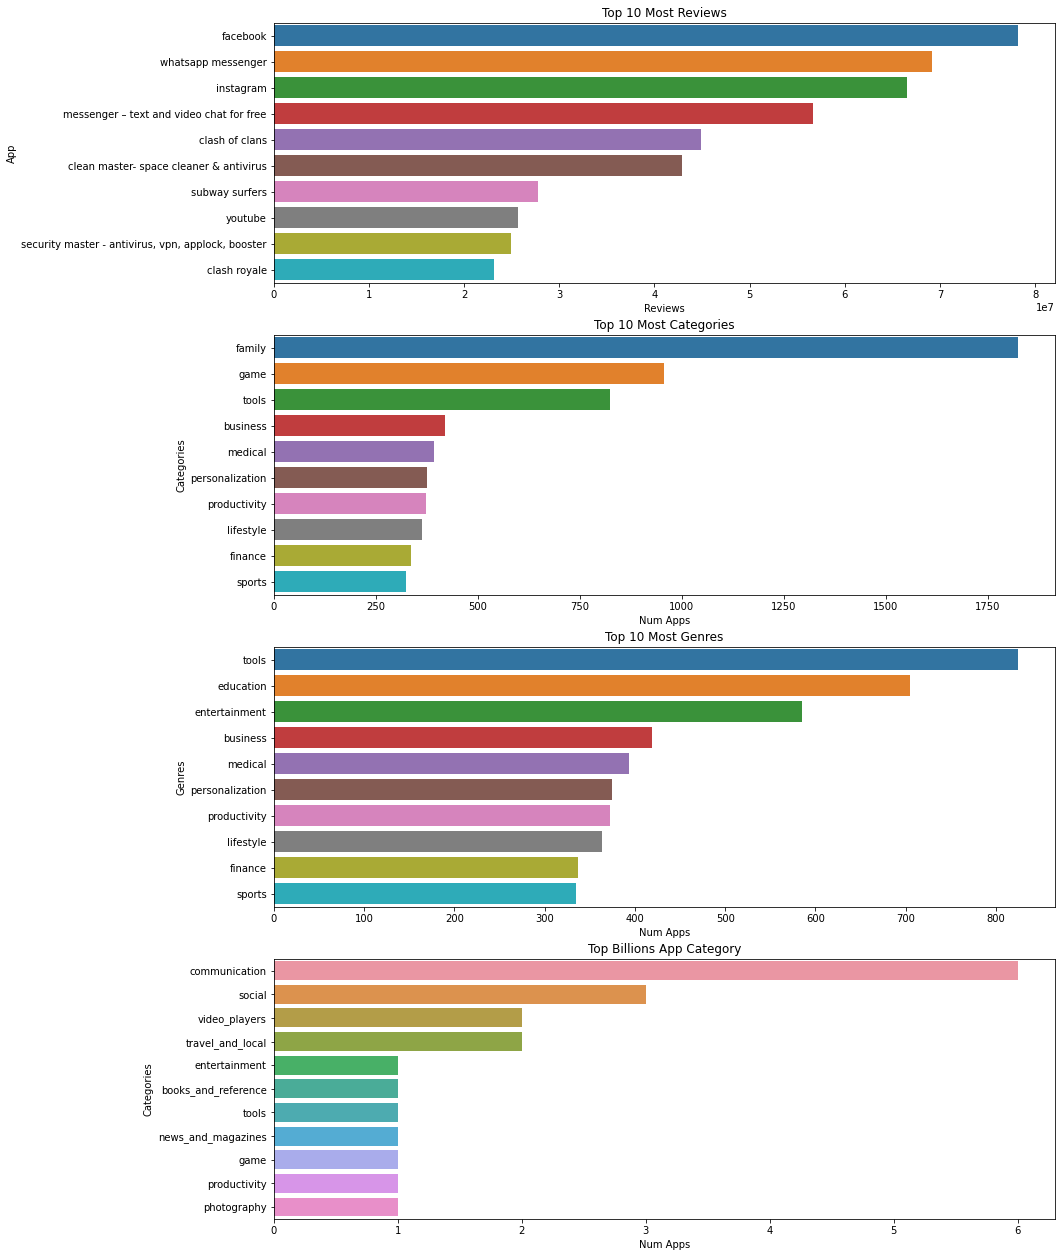

<Figure size 720x360 with 0 Axes>

In [144]:
# Top 10 Most ...
fig, axes = plt.subplots(4,1, figsize=(14, 22))

total_genres = data.Genres.to_numpy()
list_genres = list(dictionary)
count_genres = [0] * len(dictionary)
for genres in total_genres:
    for genre in genres.split():
        if genre in dictionary:
            count_genres[list_genres.index(genre)] += 1

count_genres = np.array(count_genres)
list_genres = np.array(list_genres)
ranking = count_genres.argsort()[::-1][:10]

bills = data.Installs.str.contains('Billions')
cate_bills = data[bills].Category.value_counts() > 0
cate_bills = data[bills].Category.value_counts()[cate_bills]
fig = plt.figure(figsize=(10, 5))

top10cate = data.Category.value_counts().head(10)
top10rev = data.sort_values(by='Reviews', ascending=False).head(10)
ax0 = sns.barplot(x='Reviews', y='App', data=top10rev, ax=axes[0])
ax0.set(title='Top 10 Most Reviews')
ax1 = sns.barplot(x=top10cate.to_numpy(), y=top10cate.keys().to_numpy(), ax=axes[1])
ax1.set(xlabel='Num Apps', ylabel='Categories', title='Top 10 Most Categories')
ax2 = sns.barplot(x=count_genres[ranking], y=list_genres[ranking], ax=axes[2])
ax2.set(xlabel='Num Apps', ylabel='Genres', title='Top 10 Most Genres')
ax3 = sns.barplot(x=cate_bills.to_numpy(), y=cate_bills.keys().to_numpy(), ax=axes[3])
ax3.set(xlabel='Num Apps', ylabel='Categories', title='Top Billions App Category')
plt.show()

**=> It's hard to compete in the communication app or social app with Big Tech Companies**

**=> Top 4 Reviews belong from Meta. Unlike Google, Meta apps are not auto-downloaded with android but people still care about these apps**

**=> Top commom apps are tool, education and entertainment for family, game and tool**

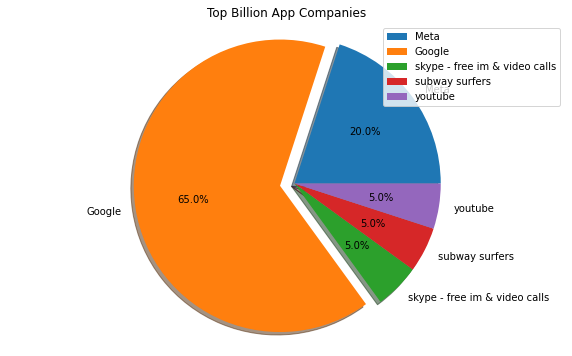

In [145]:
g_text = data.App.str.contains('google|gmail|hangouts|maps')
meta = data.App.str.contains('facebook|messenger|whatsapp|instagram')
googles = data[np.logical_and(g_text, bills)]
metas = data[np.logical_and(meta, bills)]

labels = ['Meta', 'Google']
sizes = [metas.shape[0], googles.shape[0]]
explodes = [0, 0.1]

for app in data[bills].App:
    if app not in googles.App.to_numpy() and app not in metas.App.to_numpy():
        labels.append(app)
        sizes.append(1)
        explodes.append(0)

sizes = np.array(sizes) / sum(sizes)
fig = plt.figure(figsize=(10, 6))
plt.pie(sizes, explode=explodes, labels=labels, autopct='%1.1f%%', shadow=True)
plt.axis('equal')
plt.legend()
plt.title('Top Billion App Companies')
plt.show()

**=> Googles are available from almost android mobile**

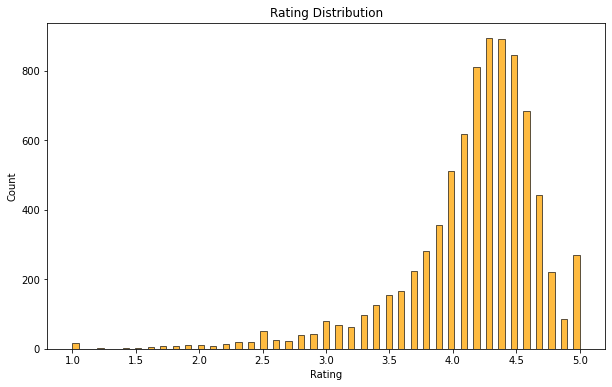

In [146]:
fig = plt.figure(figsize=(10, 6))
sns.histplot(data[data.Rating >= 1].Rating, color="orange")
plt.title('Rating Distribution')
plt.show()

**=> People usually give most of the 4 stars. Personal thinking, I don't believe 5 stars apps**

<AxesSubplot:>

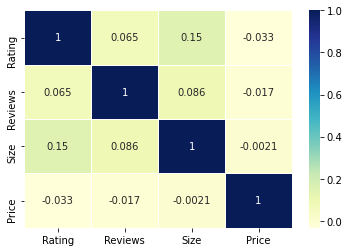

In [147]:
sns.heatmap(data.corr(), annot=True, linewidths=0.5, cmap="YlGnBu")

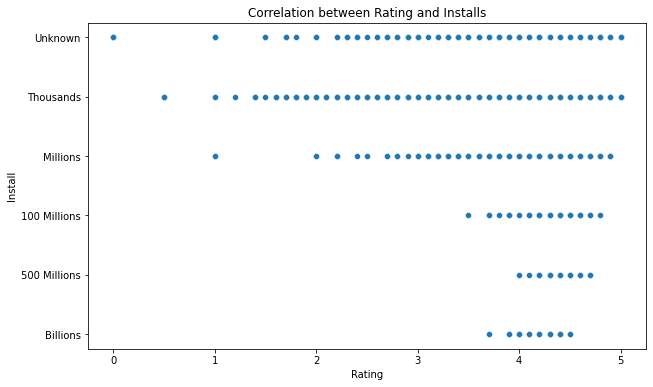

In [148]:
# Correlation between Rating and Installs
def labelize(series):
    if series == 'Unknown App':
        return 0
    elif series == 'Thousands':
        return 1
    elif series == 'Millions':
        return 2
    elif series == '100 Millions':
        return 3
    elif series == '500 Millions':
        return 4
    else:
        return 5

install_label = data.Installs.apply(labelize)
fig = plt.figure(figsize=(10, 6))
sns.scatterplot(x=data.Rating, y=install_label)
plt.yticks([0,1,2,3,4,5],['Unknown', 'Thousands', 'Millions', '100 Millions', '500 Millions', 'Billions'])
plt.ylabel('Install')
plt.title('Correlation between Rating and Installs')
plt.show()

**=> Almost billions or beyond 100 million installed apps have about 4 stars, while the others fluctuated**

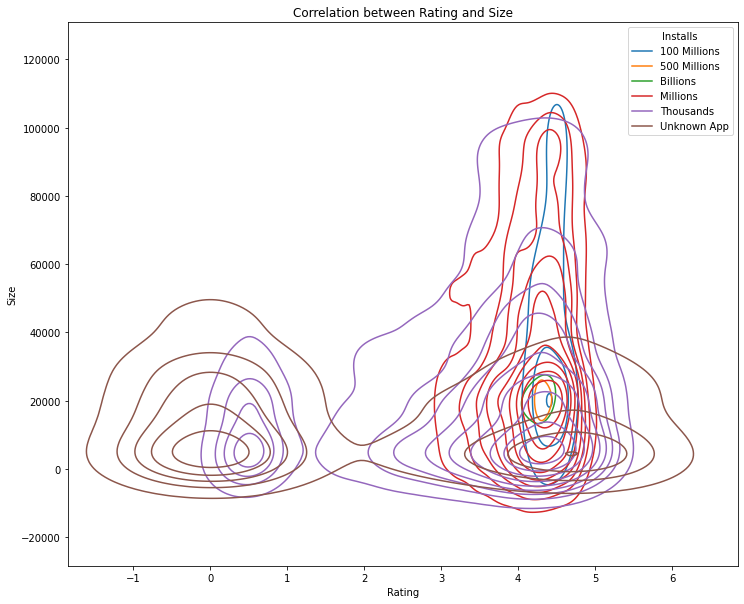

In [153]:
fig = plt.figure(figsize=(12, 10))
sns.kdeplot(x='Rating', y='Size', data=data, hue='Installs',color = 'mediumaquamarine')
plt.title('Correlation between Rating and Size', loc='center')
plt.show()

**=> Billions installed-apps around 200M. The beyond 800MB size that have millions installer have a few apps rated at around 4.5 stars**

**=> New apps that have few installers need to keep the size low to achieve a high rate**

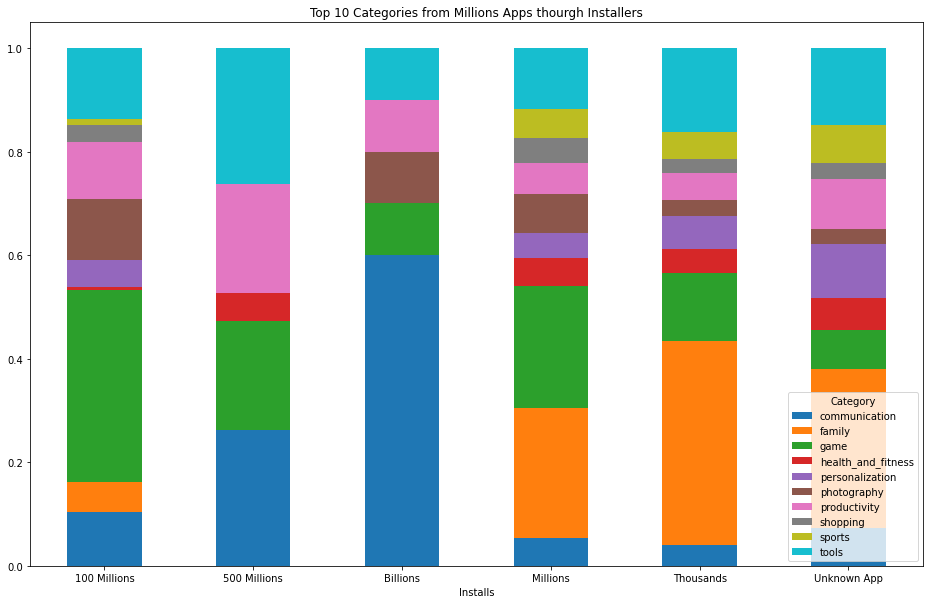

In [231]:
mills = data.Installs.str.contains('Millions')
mills_cate = data[mills].Category.value_counts().nlargest(10)

list_millions_cate = mills_cate.index.to_list()
top_app_cate = data[data.Category.isin(list_millions_cate)]
top_app_cate = pd.crosstab(top_app_cate.Installs, top_app_cate.Category).apply(lambda x: x/x.sum(), axis=1)

top_app_cate.plot(kind='bar', stacked=True, figsize=(16,10))
plt.xticks(rotation=0)
plt.title('Top 10 Categories from Millions Apps thourgh Installers')
plt.show()

**Top 10 common categories apps based on millions:**

**=> There no category of family in Billions and 500 Millions.**

**=> Shopping App appear just a few**

**=> Family and Game are not a common categories at beyond 500 Millions figure**

In [280]:
print('Summary')
print('Total App in 2018: {} Apps'.format(data.shape[0]))
print('Total App Reviews in 2018: {} Reviews'.format(data.Reviews.sum()))
print('Total Categories: {} Categories'.format(data.Category.nunique()))
print('Total Genres: {} Genres'.format(data.Genres.nunique()))
print('-'*50)
print('Top verion of android: ver {} '.format(data['Android Ver'].describe().top))
print('Most Review App: {}'.format(data.loc[data.Reviews.nlargest(1).index[0]].App))
print('Largest Size App: {}'.format(data.loc[data.Size.nlargest(1).index[0]].App))
print('Top Content Rating: {} ({} Apps)'.format(data['Content Rating'].describe().top, data['Content Rating'].value_counts()[0]))

Summary
Total App in 2018: 9620 Apps
Total App Reviews in 2018: 2087100867 Reviews
Total Categories: 33 Categories
Total Genres: 111 Genres
--------------------------------------------------
Top verion of android: ver 4.1 and up 
Most Review App: facebook
Largest Size App: post bank
Top Content Rating: Everyone (7867 Apps)
